## Karhunen–Loève expansion for mean-square integrable random fields

Let $H$ be a separable Hilbert space. A linear operator $C\colon H\mapsto H$ is the covariance of two $H$-valued random variables $X$ and $Y$ if
\begin{align}
(C\phi, \psi)_H = Cov((\phi,X),(\psi,Y)),\quad \forall \phi,\psi\in H.
\end{align}
X and Y are said to be uncorrelated if $C$ is the zero operator. 

Let $c\in L^2(D\times D)$ be a correlation function.
Then, a covariance operator $C$ is defined by
\begin{align}
(C\phi)(x) = \int\limits_{D}c(x,y)\phi(y)\mathrm{d}y,\quad x\in D.
\end{align}

#### Example
For $D\subset \mathbb{R}^d$ and $\kappa\in L^2(\Omega, L^2(D))$ consider for $\phi, \psi\in L^2(D)$ the covariance operator $C\colon L^2(D)\to L^2(D)$
\begin{align}
  (C\phi, \psi)_{L^2(D)} = Cov((\phi, u)_{L^2(D)}, (\psi, u)_{L^2(D)}).
\end{align}
By definition of the real valued covariance, one obtains using Fubinis Theorem
\begin{align}
  Cov((\phi, u)_{L^2(D)}, (\psi, u)_{L^2(D)}) = \int_D\int_D \mathbb{E}[(u(x) - \mathbb{E}[u(x)])(u(y) - \mathbb{E}[u(y)])]\phi(x)\psi(y)\mathrm{d}x\mathrm{d}y,
\end{align}
which implies, $Cov(u(x), u(y))$ is the correlation function (kernel) of the covariance operator $C$, i.e.
\begin{align}
  (C\phi)(x) = \int_D Cov(u(x), u(y)) \phi(y)\mathrm{d}y.
\end{align}

Let $C$ be positive, self-adjoint and compact.
Suppose that $\kappa\in L^2(\Omega, L^2(D))$. Then 
\begin{align}
\kappa(x,\omega) = \mu(x) + \sum\limits_{m=1}^\infty\sqrt{\lambda_m}\phi_m(x)\xi_j(\omega)
\end{align}
with convergence in $L^2(\Omega,L^2(D))$. Here $\{(\lambda_m,\phi_m)\}$ are eigenfunctions of the operator $C$. The random variables $\xi_j$ have mean zero, unit variance and are pairwise uncorrelated and 
\begin{align}
\xi_j(\omega) := \frac{1}{\sqrt{\lambda_j}}(\kappa(\omega)-\mu, \phi_j)_{L^2(D)}.
\end{align}
If the field $\kappa$ is Gaussian, then $\xi\sim \mathcal{N}(0,1)$ iid.

A truncated KLE and thus field representation of order $M< \infty$ reads
\begin{align}
\kappa_M(x,\omega):=\mu(x) + \sum\limits_{m=1}^M\sqrt{\lambda_m}\phi_m(x)\xi_j(\omega)
\end{align}

The truncation error will depend on the *decay of eigenvalues*. 

#### remark I
The truncation level $M$ corresponds with a random dimension. 

#### remark II
More regularity of $c$ may imply better convergence situation of the KLE. E.g. if $c\in\mathcal{C}(\overline{D}\times\overline{D})$, then eigenfunctions are continous and
\begin{align}
\operatorname{sup}\limits_{x\in D} \mathbb{E}[ (\kappa(x) - \kappa_M(x))^2]\rightarrow 0\text{ as } M \to \infty.
\end{align}


## Matérn covariance function
Let $r = |x-y|$, then the Matérn covariance function is given as 
\begin{align}
c(x,y) = c(r) = \sigma^2\frac{2^{1-\nu}}{\Gamma(\nu)}\left(\sqrt{2\nu}\frac{r}{\rho}\right)^{\nu}K_\nu\left(\sqrt{2\nu}\frac{r}{\rho}\right)
\end{align}
with *gamma function* $\Gamma$, $K_\nu$ modified Bessel function of second kind and $\rho,\nu\geq 0$.
The parameter $\rho$ accounts for the *correlation length* and $\nu$ represents the *smoothness* of the covariance function.

#### special case I $\nu =1/2$
The *exponential covariance function* is given as
\begin{align}
c(r) = \sigma^2 \exp\left(-\frac{r}{\rho}\right).
\end{align}

#### special case II $\nu\to\infty$
The *squared exponential covariance function*
\begin{align}
c(r) = \sigma^2\exp\left(-\frac{r^2}{2\rho^2}\right).
\end{align}

### Exercise 
Solve the eigenvalue problem $C\phi = \lambda \phi$ in $H=L^2(D)$ with an underlying exponential and squared exponential covariance function $c$. Plot and discuss the decay of eigenvalues with varying values of $\rho > 0$.
An implementation of the exponential covariance function and the solver is given below.



#### a simple approach:

Let $V_h\subset H^1(D)\subset L^2(D)$ be a $H^1(D)$ conform FE space with $V_h = \operatorname{span}\{\phi_k\}$. 
Using the FE approximation $c(x,y) \approx \sum\limits_{ij}c_{ij} \phi_i(x)\phi_j(y)$ in $L^2(D\times D)$. Then, a discretisation yield a generalised eigenvalue problem of the form.
\begin{align}
M^T[C]M \alpha = \lambda M \alpha,
\end{align}
with $[C]_{ij}=c_{ij}$. Note that this is a symmetric generalised EVP in opposite to the equivalent EVP $[C]M\alpha = \lambda\alpha$. 

#### Bonus
Test the * slow validation* subversion. Increase the refinement level $N$ and discuss the performance (with vectorization only!).


In [1]:
from __future__ import division
from dolfin import *
import scipy.sparse.linalg as spla
import numpy as np

Example implementation of the exponential covariance function.

In [2]:
def cov_exp(r, rho, sigma2=1.0):
    return sigma2 * np.exp(-1/rho * r)

In [3]:
def solve_covariance_EVP(cov, N, k, degree=1):
    """
    
    """
    def setup_FEM(N):
        mesh = UnitSquareMesh(N,N)
        V = FunctionSpace(mesh, 'CG', degree)
        u = TrialFunction(V)
        v = TestFunction(V)
        return mesh, V, u, v
    # construct FEM space
    mesh, V, u, v = setup_FEM(N)

    # dof to vertex map
    dof2vert = dof_to_vertex_map(V)
    # coords will be used for interpolation of covariance kernel
    coords = mesh.coordinates()
    # but we need degree of freedom ordering of coordinates
    coords = coords[dof2vert]
    # assemble mass matrix and convert to scipy
    M = assemble(u*v*dx)
    M = M.array()

    # evaluate covariance matrix
    L = coords.shape[0]
    if True: # vectorised
            c0 = np.repeat(coords, L, axis=0)
            c1 = np.tile(coords, [L,1])
            r = np.abs(np.linalg.norm(c0-c1, axis=1))
            C = cov(r)
            #C = cov(c0-c1)
            C.shape = [L,L]
    else:   # slow validation
        C = np.zeros([L,L])
        for i in range(L):
            for j in range(L):
                if j <= i:
                    v = cov(np.linalg.norm(coords[i]-coords[j]))
                    C[i,j] = v
                    C[j,i] = v
    # solve eigenvalue problem
    A = np.dot(M, np.dot(C, M))
    w, v = spla.eigsh(A, k, M)
    # return eigenpairs
    print "===== EVP size =====", A.shape, w.shape, v.shape
    #v = np.array([z[dof2vert] for z in v.T])
    return w, v, V

With the method we can now approximate the eigenvalues.

In [4]:
 lambdas, phis, V  = solve_covariance_EVP(lambda r : cov_exp(r, rho=0.1, sigma2=1.0), 
                                            N = 30, k = 30, degree = 1)
    
 lambdas_2, phis_2, V_2  = solve_covariance_EVP(lambda r : cov_exp(r, rho=1., sigma2=1.0), 
                                            N = 30, k = 30, degree = 1)

===== EVP size ===== (961, 961) (30,) (961, 30)
===== EVP size ===== (961, 961) (30,) (961, 30)


And plot them...

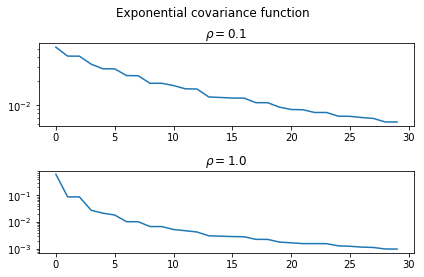

In [5]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure()
plt.suptitle("Exponential covariance function")
plt.subplot(211)
plt.semilogy(range(len(lambdas)), sorted(lambdas, reverse=True))
plt.title(r"$\rho=0.1$")
plt.subplot(212)
plt.semilogy(range(len(lambdas_2)), sorted(lambdas_2, reverse=True))
plt.title(r"$\rho=1.0$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Field representation on finite element function space
### Affine coefficient representation
As an example of an artificial random field, given e.g. by a KL formulation, we take our usual example field in affine representation of the finite i.i.d. random variables $\boldsymbol \xi = (\xi_1, \ldots,\xi_M)$
$$
 \tag 1
  \kappa(x, \boldsymbol{\xi}(\omega)) = \langle \kappa \rangle + \gamma \sum_{k=1}^M k^{-\sigma}\cos\left(2\pi\left\lceil \frac{k+1}{2}\right\rceil x_1\right)\cos\left(2\pi\left\lfloor \frac{k+1}{2} \right\rfloor x_2\right) \xi_k(\omega)
$$
where $\sigma$ denotes a decay parameter that controls the roughness of a realisation, $\gamma$ is a scaling factor and $\langle \kappa \rangle$ is the mean value of the field.

To ensure uniform boundedness $0 < \check{\kappa} \leq \kappa(x, \boldsymbol\xi(\omega))$ we need to adjust the involved parameter.
In the uniform case of $\boldsymbol\xi\sim\mathcal{U}([-1, 1]^M)$, one can easily see the dependence on the choice of $\gamma > 0$, $\sigma > 1$ and the mean value $\langle \kappa \rangle$.

## Exercise:

Write a python class/object that represents the diffusion coefficient $\kappa\colon D\times\Omega \to \mathbb{R}$ as in (1).
A coefficient must implement the method __realisation(y, V)__.

__realisation__ takes a sample value $y=\boldsymbol\xi(\omega)$ and a FEniCS FunctionSpace $V$ as input and returns the interpolated FEniCS function of the Expression above (1).

Test your implementation using $\boldsymbol\xi$ as uniform random variable on $[-1, 1]^M$ and different values for $\langle\kappa\rangle, \gamma$ and $\sigma$.
E.g. $\langle \kappa\rangle = 1.1, \sigma=2, \gamma=1$.

Plot some realisations.

Hint: There exists functions np.ceil and np.floor. Maybe, the parametrized version of FEniCS Expression can be useful.

### Log-Normal Diffusion coefficient
In practice, especially when considering the ground-water flow motivation, diffusion fields are often modeled by a more involved structure. 
The so-called log-normal case is defined by setting $\log \kappa$ as a Gaussian field. 
We can model this by simply taking the field in (1) and assuming that $\boldsymbol\xi$ is a standard Gaussian random vector, due to the linearity of the affine representation, $\log \kappa$ is again Gaussian.

To ensure positivity, one usually takes $\exp \kappa$ as diffusion coefficient.

## Exercise:
Adapt your implementation of the last exercise such that the function $\kappa\colon D\times \Omega\to \mathbb{R}$ can represent a log-normal diffusion field.

Plot some realisations.

### Compute statistics of random fields
Consider a random variable $X\colon \Omega\to E$ defined on some probability space $(\Omega, \Sigma, \mathbb{P})$ with values in some vector space $E\subseteq \mathbb{R}^d$.
The $E$-valued mean of $X$ can be approximated by the most simple quadrature rule:

Given a set of samples $(x_1, \ldots, x_N)$ of $X$, compute
$$
  \mathbb{E}[X] = \int_\Omega x \;\mathbb{P}(dx) \approx \frac{1}{N}\sum_{i=1}^N x_i.
$$

The same holds for the variance of $X$. Here, we need to compute the second moment of $X$, since
$$
  \mathbb{V}(X) = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
and obviously
$$
  \mathbb{E}[X^2] = \int_\Omega x^2 \;\mathbb{P}(dx) \approx \frac{1}{N}\sum_{i=1}^N x_i^2.
$$

## Exercise
Implement a python method that approximates the mean and variance of a random variable

In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from dolfin import * # UnitSquareMesh, FunctionSpace, plot, Function, Expression, interpolate
from functools import partial

% matplotlib inline

In [7]:
class CoefField:
    """ artificial M-term KL
    """
    def __init__(self, mean, expfield, M, scale=1.0, decay=2.0):
        # type: (float, bool, int, float, float) -> None
        """
         initialise field with given mean.
         field is log-uniform for expfield=True.
         length M of expansion can optionally be fixed in advance.
         usually it is determined by the length of y when evaluating realisations.
        :param mean: mean value of the field
        :param expfield: Switch to go to lognormal field
        :param M: maximal number of terms in realisation
        :param decay: decay of the field
        :return: void
        """
        #                                           # create a Fenics expression of the affine field
        self.a = Expression('C + S*cos(A*pi*F1*x[0]) * cos(A*pi*F2*x[1])', A=2, C=mean, F1=0, F2=0, S=1, degree=5)
        self.mean = mean
        self.expfield = expfield
        self.M = M
        self.scale = scale
        self.decay = decay

    def realisation(self, y, V):
        # type: (List[float], FunctionSpace) -> Function
        """
          evaluate realisation of random field subject to samples y and return interpolation onto FEM space V.
        :param y: list of samples of the RV in [-1, 1]
        :param V: FunctionSpace
        :return: Fenics Function as field realisation
        """

        def indexer(i):
            m1 = np.floor(i/2)
            m2 = np.ceil(i/2)
            return m1, m2
        assert self.M == len(y)                     # strong assumption but convenient
        a = self.a                                  # store affine field Expression

        a.C, a.S = self.mean, 0                     # get mean function as starting point
        x = interpolate(a, V).vector().array()      # interpolate constant mean on FunctionSpace
        a.C = 0                                     # set mean back to zero. From now on look only at amp_func
        #                                           # add up stochastic modes
        if self.M > 0:
            #                                       # get mean-length ratio
            for m, ym in enumerate(y):              # loop through sample items
                amp = (m+1) ** (-1 * self.decay)    # algebraic decay in front of the sin*sin
                a.F1, a.F2 = indexer(m+2)           # get running values in Expression
                a.S = self.scale                    # multiply a scaling parameter as well
                #                                   # add current Expression value
                x += amp * ym * interpolate(a, V).vector().array()
        f = Function(V)                             # create empty function on FunctionSpace
        #                                           # set function coefficients to realisation coefficients
        f.vector()[:] = x if not self.expfield else np.exp(x)
        return f



In [8]:
def sample_expectation(rv, N):
    mean = 0
    for i in range(N):
        mean += rv.sample()
    mean *= N**(-1)
    return mean

def sample_variance(rv, N):
    var = 0
    mean = sample_expectation(rv, N)
    for i in range(N):
        var += rv.sample()**2
    var *= N**(-1)
    return var - mean**2

In [9]:
mesh = UnitSquareMesh(25, 25)
fs = FunctionSpace(mesh, 'CG', 1)

mean = 1.0
expfield = True
M = 10
scale = 1.0
decay = 2.0
affine_field = CoefField(mean, not expfield, M, scale, decay)
log_field = CoefField(mean, expfield, M, scale, decay)

def sample_field_affine():
    y = np.random.rand(M)*2 - 1
    return affine_field.realisation(y, fs).vector().array()
def sample_field_log():
    y = np.random.randn(M)
    return log_field.realisation(y, fs).vector().array()

affine_field.sample = sample_field_affine
log_field.sample = sample_field_log

In [10]:
def set_fem_fun(vec, fs):
    retval = Function(fs)
    retval.vector().set_local(vec)
    return retval

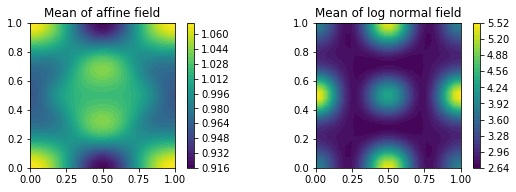

In [11]:
mean_affine = set_fem_fun(sample_expectation(affine_field, 100), fs)
mean_log = set_fem_fun(sample_expectation(log_field, 100), fs)

mpl.rcParams['figure.figsize'] = [8, 3]
plt.figure()
plt.subplot(121)
im = plot(mean_affine)
plt.colorbar(im)
plt.title("Mean of affine field")
plt.subplot(122)
im = plot(mean_log)
plt.colorbar(im)
plt.title("Mean of log normal field")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

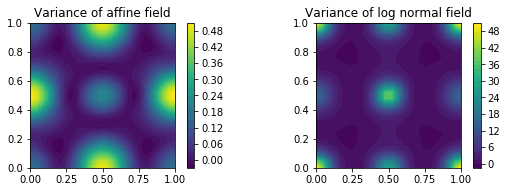

In [12]:
var_affine = set_fem_fun(sample_variance(affine_field, 100), fs)
var_log = set_fem_fun(sample_variance(log_field, 100), fs)


plt.figure()
plt.subplot(121)
im = plot(var_affine)
plt.colorbar(im)
plt.title("Variance of affine field")
plt.subplot(122)
im = plot(var_log)
plt.colorbar(im)
plt.title("Variance of log normal field")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

End of part III. Next: *Stochastic Galerkin*

<div style="text-align: right; color: #a5a9af"> &copy; Robert Gruhlke, Manuel Marschall, Phillip Trunschke, 2018-2019</div>